<a href="https://colab.research.google.com/github/mehrnaz1368/classification/blob/main/stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
from scipy.stats import boxcox
rcParams['figure.figsize']=10,6
df=pd.read_csv("Book12.csv")
df['IP']


0          18
1          25
2          26
3          27
4          21
5          27
6          27
7          41
8          46
9          40
10         41
11         39
12         44
13         46
14         67
15        107
16        158
17        226
18        380
19        516
20        887
21       1262
22       1539
23       2014
24       2990
25       4046
26       5731
27       9179
28      12743
29      17318
30      21530
31      26561
32      33824
33      40561
34      46438
35      59161
36      86092
37     131567
38     162056
39     208631
40     228439
41     280185
42     340518
43     457311
44     594653
45     820289
46    1153425
47    1761390
Name: IP, dtype: int64

# checking exist null or not

In [44]:
print(df.isnull().sum())

year    0
IP      0
L       0
dtype: int64


#check stationary

In [45]:
from statsmodels.tsa.stattools import adfuller
x_stationarityTest = adfuller(df['IP'], autolag='AIC')
print("P-value: ", x_stationarityTest[1])

P-value:  0.9913781614500893


it is not stationary because P-Value>0.05

#remove non-stationary

<Axes: >

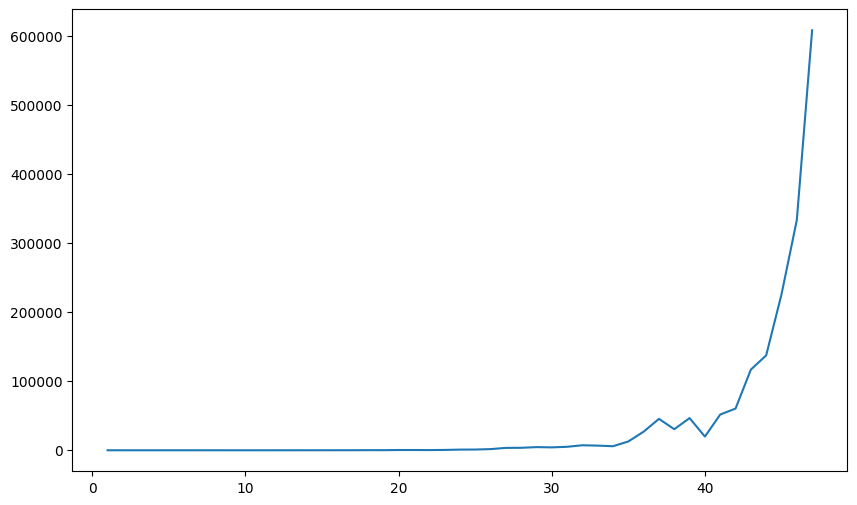

In [46]:
z = df['IP'] - df['IP'].shift(1)
z.dropna().plot()


In [ ]:
o = z.fillna(method='ffill').fillna(method='bfill')
print (o)

In [53]:
from statsmodels.tsa.stattools import adfuller
o_stationarityTest = adfuller(o, autolag='AIC')
print("P-value: ", o_stationarityTest[1])

P-value:  0.9980442947051076


the stationary couldn't remove

#remove non-stationary with lag

In [ ]:
v = np.log(df['IP'])
print(v)

In [55]:
from statsmodels.tsa.stattools import adfuller
v_stationarityTest = adfuller(v, autolag='AIC')
print("P-value: ", v_stationarityTest[1])


P-value:  0.9893710115922884


<Axes: >

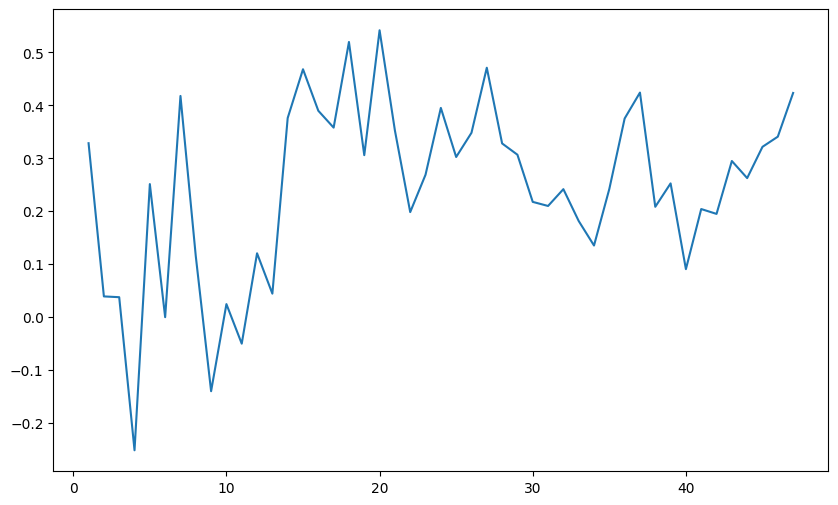

In [59]:
n = v - v.shift(1)
n.dropna().plot()

In [ ]:
d = n.fillna(method='ffill').fillna(method='bfill')
print (d)

In [64]:
from statsmodels.tsa.stattools import adfuller
d_stationarityTest = adfuller(d, autolag='AIC')
print("P-value: ", d_stationarityTest[1])

P-value:  0.0012329578825243796


#train and test

In [66]:
d_train,d_test= train_test_split(d,test_size=0.25,random_state=0)
print(d_test)

29    0.306764
4    -0.251314
26    0.348161
30    0.217701
32    0.241727
37    0.424100
34    0.135311
40    0.090702
7     0.417735
10    0.024693
11   -0.050010
31    0.209997
Name: IP, dtype: float64


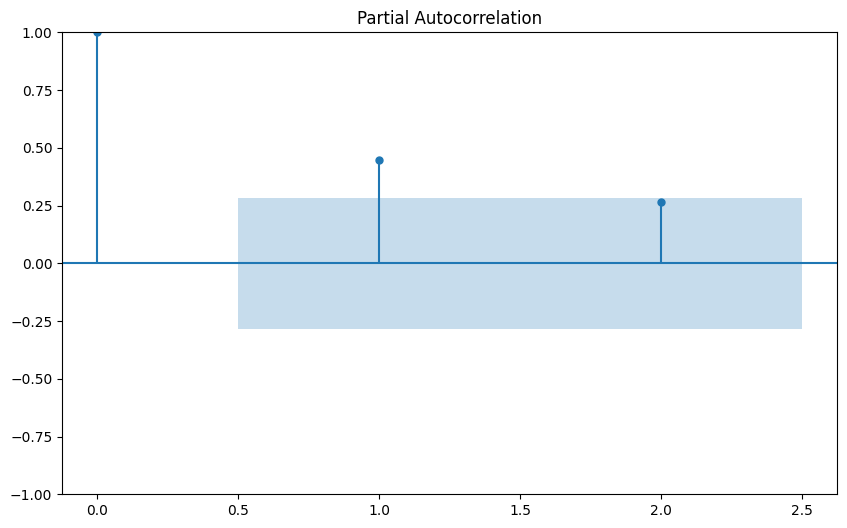

In [74]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(d, lags=2)


#Auto Regression

In [75]:
ar_model = AutoReg(d_train, lags=2).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                     IP   No. Observations:                   36
Model:                     AutoReg(2)   Log Likelihood                  17.176
Method:               Conditional MLE   S.D. of innovations              0.146
Date:                Sat, 11 Nov 2023   AIC                            -26.351
Time:                        08:16:33   BIC                            -20.246
Sample:                             2   HQIC                           -24.269
                                   36                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3325      0.070      4.760      0.000       0.196       0.469
IP.L1         -0.0709      0.165     -0.431      0.666      -0.393       0.252
IP.L2         -0.1754      0.164     -1.069      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
pred = ar_model.predict(start=len(d_train), end=(len(df)-1), dynamic=False)
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(d_test, color='red')

In [77]:
d_pred = ar_model.predict(start=len(d_train), end=(len(df)-1), dynamic=False)
print(pred)


36    0.256307
37    0.268309
38    0.268564
39    0.266441
40    0.266547
41    0.266912
42    0.266867
43    0.266806
44    0.266818
45    0.266828
46    0.266825
47    0.266824
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [92]:
from sklearn.metrics import r2_score
d_t